In [2]:
import matplotlib.pyplot as plt
import scipy.io
import helper_functions.helper_functions as helper

# Change this to GPU or CPU depending on your machine
%run fista_spectral_cupy.py GPU

device =  GPU , using GPU and cupy


In [3]:
if device == 'GPU':
    import cupy as np
    np.cuda.Device(2).use()
else:
    import numpy as np

## Load in calibration data and image

In [4]:
loaded_mat = scipy.io.loadmat('SampleData/calibration.mat')
img = plt.imread('SampleData/meas_thordog.png')

In [5]:
mask, psf, img = helper.preprocess(loaded_mat['mask'], loaded_mat['psf'], img)

In [6]:
# Place variables on GPU if using GPU
if device == 'GPU': 
    mask = np.asarray(mask)
    psf = np.asarray(psf)
    img = np.asarray(img)
    

## Setup FISTA Algorithm

In [7]:
fista = fista_spectral_numpy(psf, mask[:,:,0:-1])

In [8]:
fista.iters = 500

# Default: tv, Options: 'native' for native sparsity, 'non-neg' for enforcing non-negativity only
fista.prox_method = 'tv'  
fista.tv_lambda  = .003
fista.tv_lambdaw = 0.01 
fista.lowrank_lambda = 0.00005

iteration:  0  loss:  1310.1492106885132


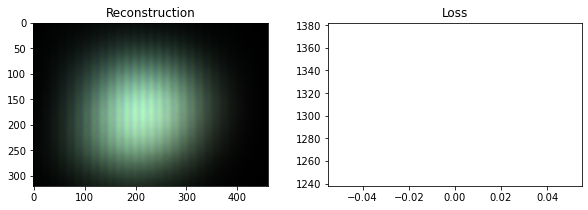

KeyboardInterrupt: 

In [9]:
out_img = fista.run(img)

In [10]:
out_img = fista.out_img
fc_img = helper.pre_plot(helper.stack_rgb_opt(out_img))


In [ ]:
plt.imshow(fc_img); plt.axis('off');

In [ ]:
helper.plt3D(helper.pre_plot(out_img))